In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10.0, 8.0))

In [22]:
report_all = pd.read_csv("../report.csv", sep = ";" , decimal=".")
report = report_all[(report_all["exceptions"] != True) &
                    (report_all["heuristic"] != "CuttingSmallerAngle") &
                    (report_all["heuristic"] != "CuttingLargererAngle")].copy()
report["hyperplane%"] = report["hyperplane_budget"]/ report["points"]
report

,heuristic,points,hyperplane_budget,jaccard_index,time,exceptions,hyperplane%
1,CuttingSmallerAngle2,4,3,0.506585,316116.0,False,0.750000
2,CuttingLargerAngle,4,3,0.565621,114079.0,False,0.750000
3,CuttingLargerAngle2,4,3,0.562325,190635.0,False,0.750000
4,DistanceFromG,4,3,0.565621,1691606.0,False,0.750000
5,CuttingEdges,4,3,0.252979,359889.0,False,0.750000
...,...,...,...,...,...,...,...
15243,BoxCutting,28,13,0.984425,494410.0,False,0.464286
15244,BoxCutting,28,14,0.986457,489101.0,False,0.500000
15245,BoxCutting,28,15,0.988661,533461.0,False,0.535714
15246,BoxCutting,28,16,0.990628,633590.0,False,0.571429


In [23]:
def remove_outliers(group):
    Q1 = group['time'].quantile(0.25)
    Q3 = group['time'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definisci i limiti inferiori e superiori per identificare gli outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return group[(group['time'] >= lower_bound) & (group['time'] <= upper_bound)]

# Raggruppa per 'heuristic' e applica la funzione di rimozione degli outlier
df_no_outliers = report.groupby('heuristic').apply(remove_outliers)
df_no_outliers



heuristic  points  hyperplane_budget  jaccard_index  \
heuristic                                                                
BoxCutting 13505  BoxCutting       4                  3       0.131684   
           13506  BoxCutting       4                  3       0.085804   
           13507  BoxCutting       4                  3       0.636474   
           13508  BoxCutting       4                  3       0.763838   
           13509  BoxCutting       5                  3       0.505273   
...                      ...     ...                ...            ...   
LessArea   13470    LessArea      29                  9       0.597095   
           13478    LessArea      29                 10       0.599334   
           13486    LessArea      29                 11       0.599746   
           13494    LessArea      29                 12       0.602697   
           13502    LessArea      29                 13       0.909462   

                        time  exceptions  hyperplane%  
heuristic                                              
BoxCutting 13505     37956.0       False     0.750000  
           13506     54971.0       False     0.750000  
           13507     36811.0       False     0.750000  
           13508     32970.0       False     0.750000  
           13509     33147.0       False     0.600000  
...                      ...         ...          ...  
LessArea   13470  14119863.0       False     0.310345  
           13478  13346206.0       False     0.344828  
           13486  12700433.0       False     0.379310  
           13494  13166593.0       False     0.413793  
           13502  12494786.0       False     0.448276  

[12222 rows x 7 columns]

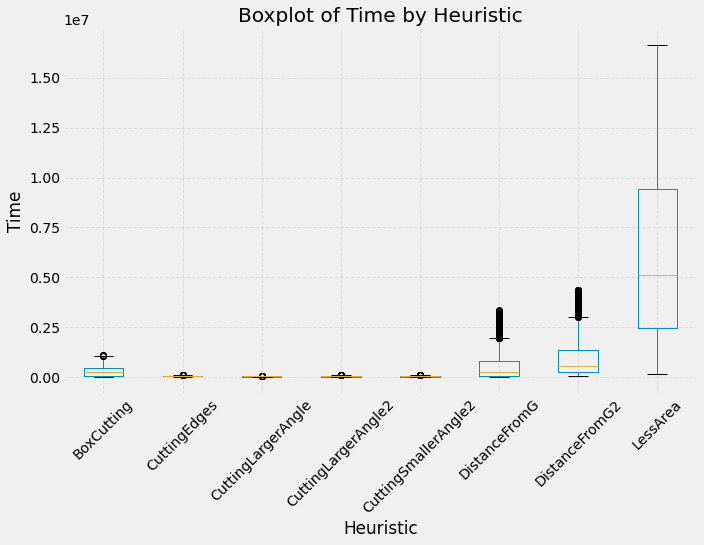

In [24]:
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.boxplot(column='time', by='heuristic', grid=False)
plt.title('Boxplot of Time by Heuristic')
plt.suptitle('')  # Remove the default title to clean up the plot
plt.xlabel('Heuristic')
plt.grid(True)
plt.ylabel('Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig('../../tesiCH/media/report/bxplt_time.pdf')
plt.show()

In [25]:
report['time_in_microseconds'] = report['time'] * 10**-3

# Calcoliamo la media raggruppata per euristica
media_per_euristica = report.groupby('heuristic')['jaccard_index', 'time_in_microseconds'].mean().round(2)
print(media_per_euristica)


                      jaccard_index  time_in_microseconds
heuristic                                                
BoxCutting                     0.90                321.24
CuttingEdges                   0.95                 53.65
CuttingLargerAngle             0.91                 30.56
CuttingLargerAngle2            0.91                 39.72
CuttingSmallerAngle2           0.48                 38.44
DistanceFromG                  0.67               1239.12
DistanceFromG2                 0.90               1691.25
LessArea                       0.75               6104.61


/var/folders/gg/5zkvqtvj26n2w4fk46nn8sqh0000gn/T/ipykernel_82000/983431265.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media_per_euristica = report.groupby('heuristic')['jaccard_index', 'time_in_microseconds'].mean().round(2)


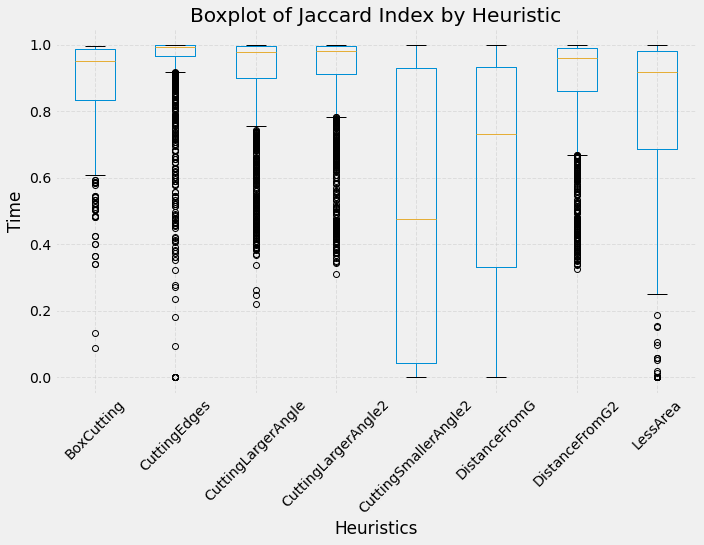

In [26]:
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.boxplot(column='jaccard_index', by='heuristic', grid=False)

plt.title('Boxplot of Jaccard Index by Heuristic')
plt.suptitle('')  # Remove the default title to clean up the plot
plt.xlabel('Heuristics')
plt.grid(True)
plt.ylabel('Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../../tesiCH/media/report/bxplt_jaccard.pdf')
plt.show()

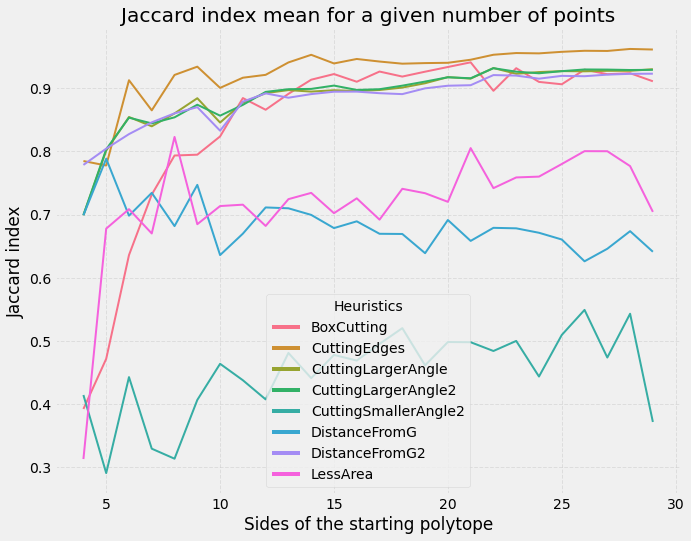

In [27]:
# Raggruppa e calcola le medie
import seaborn as sns
grouped_df = report.groupby(['heuristic', 'points'])['jaccard_index'].mean().reset_index()

# Crea il grafico a linee
sns.lineplot(data=grouped_df, x = 'points', y = 'jaccard_index', hue = 'heuristic', linewidth = 2)

plt.title('Jaccard index mean for a given number of points')
plt.xlabel('Sides of the starting polytope')
plt.ylabel('Jaccard index')
plt.legend(title = 'Heuristics')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../../tesiCH/media/report/Accuracy_plot.pdf')
plt.show()

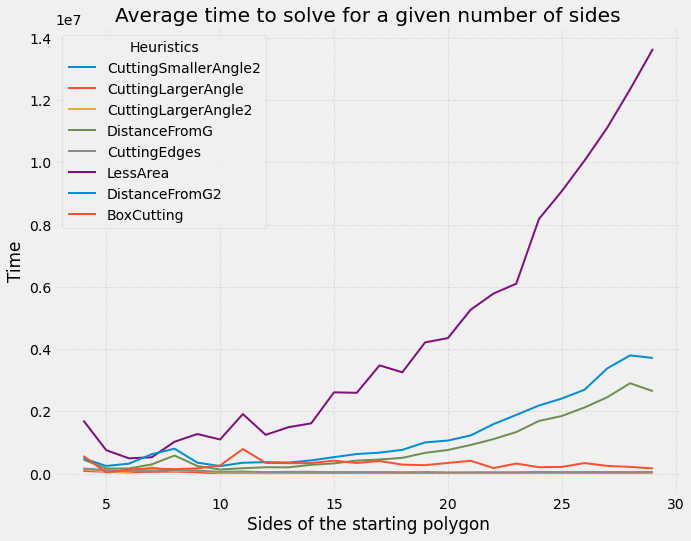

In [28]:
heuristics = report["heuristic"].unique()

for h in heuristics:
    selected = report[report["heuristic"] == h]
    y = selected.groupby("points")
    plt.plot(y["points"].unique(), y["time"].mean(), linewidth = 2, label=h)

plt.xlabel('Sides of the starting polygon')
plt.ylabel('Time')
plt.legend(title='Heuristics')
plt.title('Average time to solve for a given number of sides')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../../tesiCH/media/report/Time_plot.pdf')
plt.show()

/var/folders/gg/5zkvqtvj26n2w4fk46nn8sqh0000gn/T/ipykernel_82000/103074450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['bin'] = pd.cut(selected['hyperplane%'], bins=num_bins)
/var/folders/gg/5zkvqtvj26n2w4fk46nn8sqh0000gn/T/ipykernel_82000/103074450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['bin'] = pd.cut(selected['hyperplane%'], bins=num_bins)
/var/folders/gg/5zkvqtvj26n2w4fk46nn8sqh0000gn/T/ipykernel_82000/103074450.py:10: SettingWithCopyWarning: 
A value is trying t

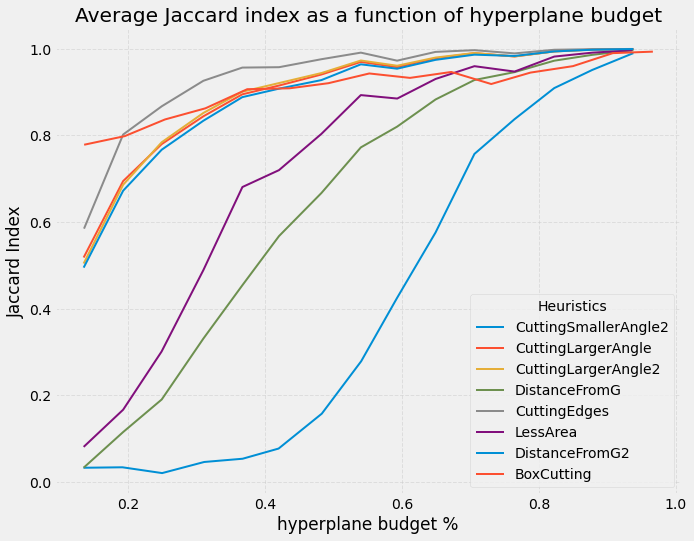

In [31]:
heuristics = report["heuristic"].unique()
# Definisci il numero di bin desiderato
num_bins = 15  # Cambia questo numero a seconda delle tue necessità

for h in heuristics:
    # Filtra i dati per l'euristica corrente
    selected = report[report["heuristic"] == h]
    
    # Crea i bin per 'hyperplane%' usando pd.cut
    selected['bin'] = pd.cut(selected['hyperplane%'], bins=num_bins)
    
    # Calcola la media di 'jaccard_index' per ogni bin
    binned_data = selected.groupby('bin').agg({'hyperplane%': 'mean', 'jaccard_index': 'mean'}).reset_index()
    
    # Plot dei dati binned
    plt.plot(binned_data['hyperplane%'], binned_data['jaccard_index'], linewidth=2, label=h)

plt.xlabel('hyperplane budget %')
plt.ylabel('Jaccard Index')
plt.legend(title='Heuristics')
plt.title('Average Jaccard index as a function of hyperplane budget')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../../tesiCH/media/report/Budget_variation.pdf')
plt.show()